In [168]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

%matplotlib inline 

In [37]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

In [38]:
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])
weather["Date"] = pd.to_datetime(weather["Date"])
spray["Date"] = pd.to_datetime(spray["Date"])

In [39]:
train.set_index("Date", inplace=True)
test.set_index("Date", inplace=True)
weather.set_index("Date", inplace=True)
spray.set_index("Date", inplace=True)

test.head(2)

,Id,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
Date,,,,,,,,,,
2008-06-11,1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2008-06-11,2,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [115]:
train_daily_mosq = train["NumMosquitos"].groupby(train.index).sum()
train_daily_mosq

Date
2007-05-29      40
2007-06-05     127
2007-06-26     216
2007-06-29      85
2007-07-02     240
2007-07-11    1103
2007-07-18     853
2007-07-19     687
2007-07-25    4069
2007-07-27     247
2007-08-01    6904
2007-08-02    2898
2007-08-03     204
2007-08-07    1780
2007-08-08    4186
2007-08-09     507
2007-08-15    4661
2007-08-16    4555
2007-08-17    1915
2007-08-21    1667
2007-08-22    4512
2007-08-24    1478
2007-08-28    4748
2007-09-04     524
2007-09-05    2021
2007-09-06    1511
2007-09-12    1193
2007-09-18     392
2007-09-19    1756
2007-09-24    1570
              ... 
2011-07-25    2449
2011-07-29    1408
2011-08-05    1065
2011-08-12     824
2011-08-19     589
2011-08-26     490
2011-09-01     319
2011-09-02     551
2011-09-12     734
2011-09-16     821
2011-09-23     728
2011-09-30     184
2013-06-07     360
2013-06-14    1670
2013-06-21    1319
2013-06-27     439
2013-06-28     923
2013-07-08    1833
2013-07-12    4796
2013-07-19    4168
2013-07-25    1974
2013-08

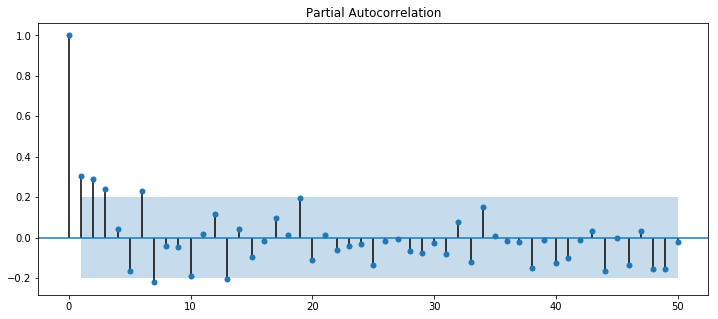

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(train_daily_mosq, lags=50, ax=ax)
plt.show()

In [42]:
train_daily_wnv = train["WnvPresent"].groupby(train.index).sum()

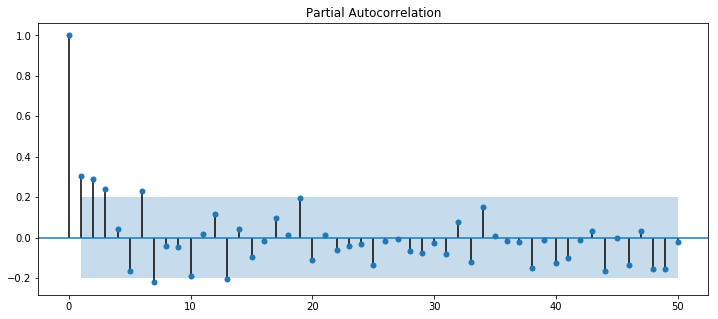

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(train_daily_mosq, lags=50, ax=ax)
plt.show()

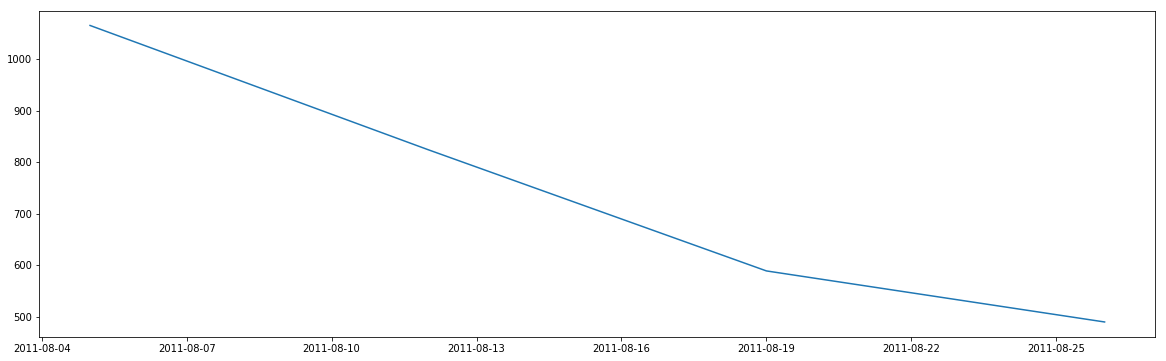

In [114]:
plt.figure(figsize=(20,6))
plt.plot(train_daily_mosq['2011-08'])
plt.show;

In [48]:
daily_spray = spray['Latitude'].groupby(spray.index).count()

In [70]:
spray['2013-08']

,Time,Latitude,Longitude
Date,,,
2013-08-08,8:22:35 PM,41.919128,-87.696737
2013-08-08,8:23:05 PM,41.918935,-87.696405
2013-08-08,8:23:15 PM,41.918665,-87.695948
2013-08-08,8:23:25 PM,41.918520,-87.695568
2013-08-08,8:23:45 PM,41.918023,-87.694743
2013-08-08,8:23:55 PM,41.917765,-87.694332
2013-08-08,8:25:15 PM,41.918230,-87.692420
2013-08-08,8:25:25 PM,41.918508,-87.692917
2013-08-08,8:25:35 PM,41.918788,-87.693403


In [59]:
daily_spray

Date
2011-08-29      95
2011-09-07    2114
2013-07-17    2202
2013-07-25    1607
2013-08-08    1195
2013-08-15    2668
2013-08-16     141
2013-08-22    1587
2013-08-29    2302
2013-09-05     924
Name: Latitude, dtype: int64

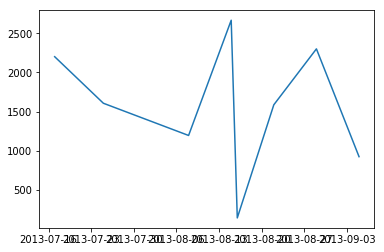

In [104]:
plt.plot(daily_spray['2013'])
plt.show;

In [92]:
weather_1 = weather[weather["Station"] == 1]
weather_2 = weather[weather["Station"] == 2]

weather_2

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,2,84,52,68,M,51,57,0,3,-,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,2,60,43,52,M,42,47,13,0,-,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,2,67,48,58,M,40,50,7,0,-,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
2007-05-04,2,78,51,M,M,42,50,M,M,-,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
2007-05-05,2,66,54,60,M,39,50,5,0,-,...,,M,M,M,T,29.46,30.09,11.2,7,11.5
2007-05-06,2,68,52,60,M,30,46,5,0,-,...,,M,M,M,0.00,29.62,30.28,13.8,10,14.5
2007-05-07,2,84,50,67,M,39,53,0,2,-,...,,M,M,M,0.00,29.44,30.12,8.5,17,9.9
2007-05-08,2,80,60,70,M,57,63,0,5,-,...,HZ,M,M,M,T,29.36,30.02,2.5,8,5.4
2007-05-09,2,76,63,70,M,60,63,0,5,-,...,BR HZ,M,M,M,0.02,29.28,29.93,3.9,7,5.9


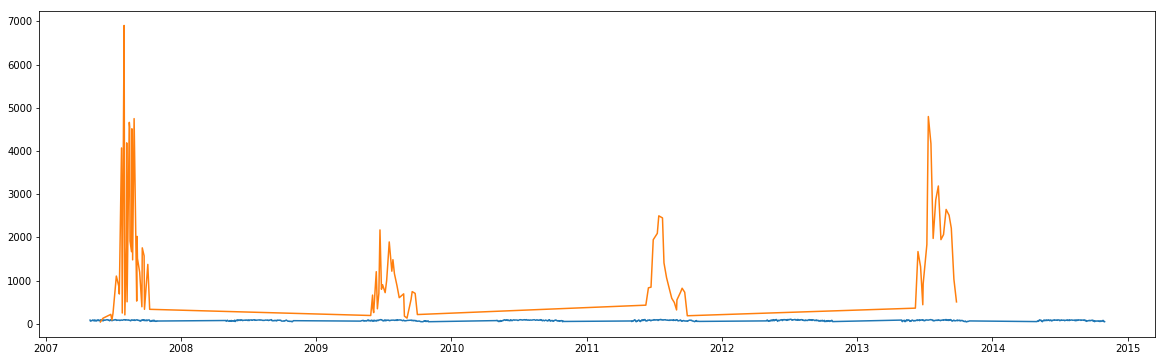

In [98]:

plt.figure(figsize=(20,6))
plt.plot(weather_1['Tmax'])
plt.plot(train_daily_mosq)
plt.show;

In [142]:
#weather_1.iloc[train_daily_mosq.index]
#train_daily_mosq.index

#train_daily_mosq = pd.DataFrame(train_daily_mosq)
#train_daily_mosq
weather_mosq = pd.merge(weather_1, train_daily_mosq, how='right', left_index=True, right_index=True)



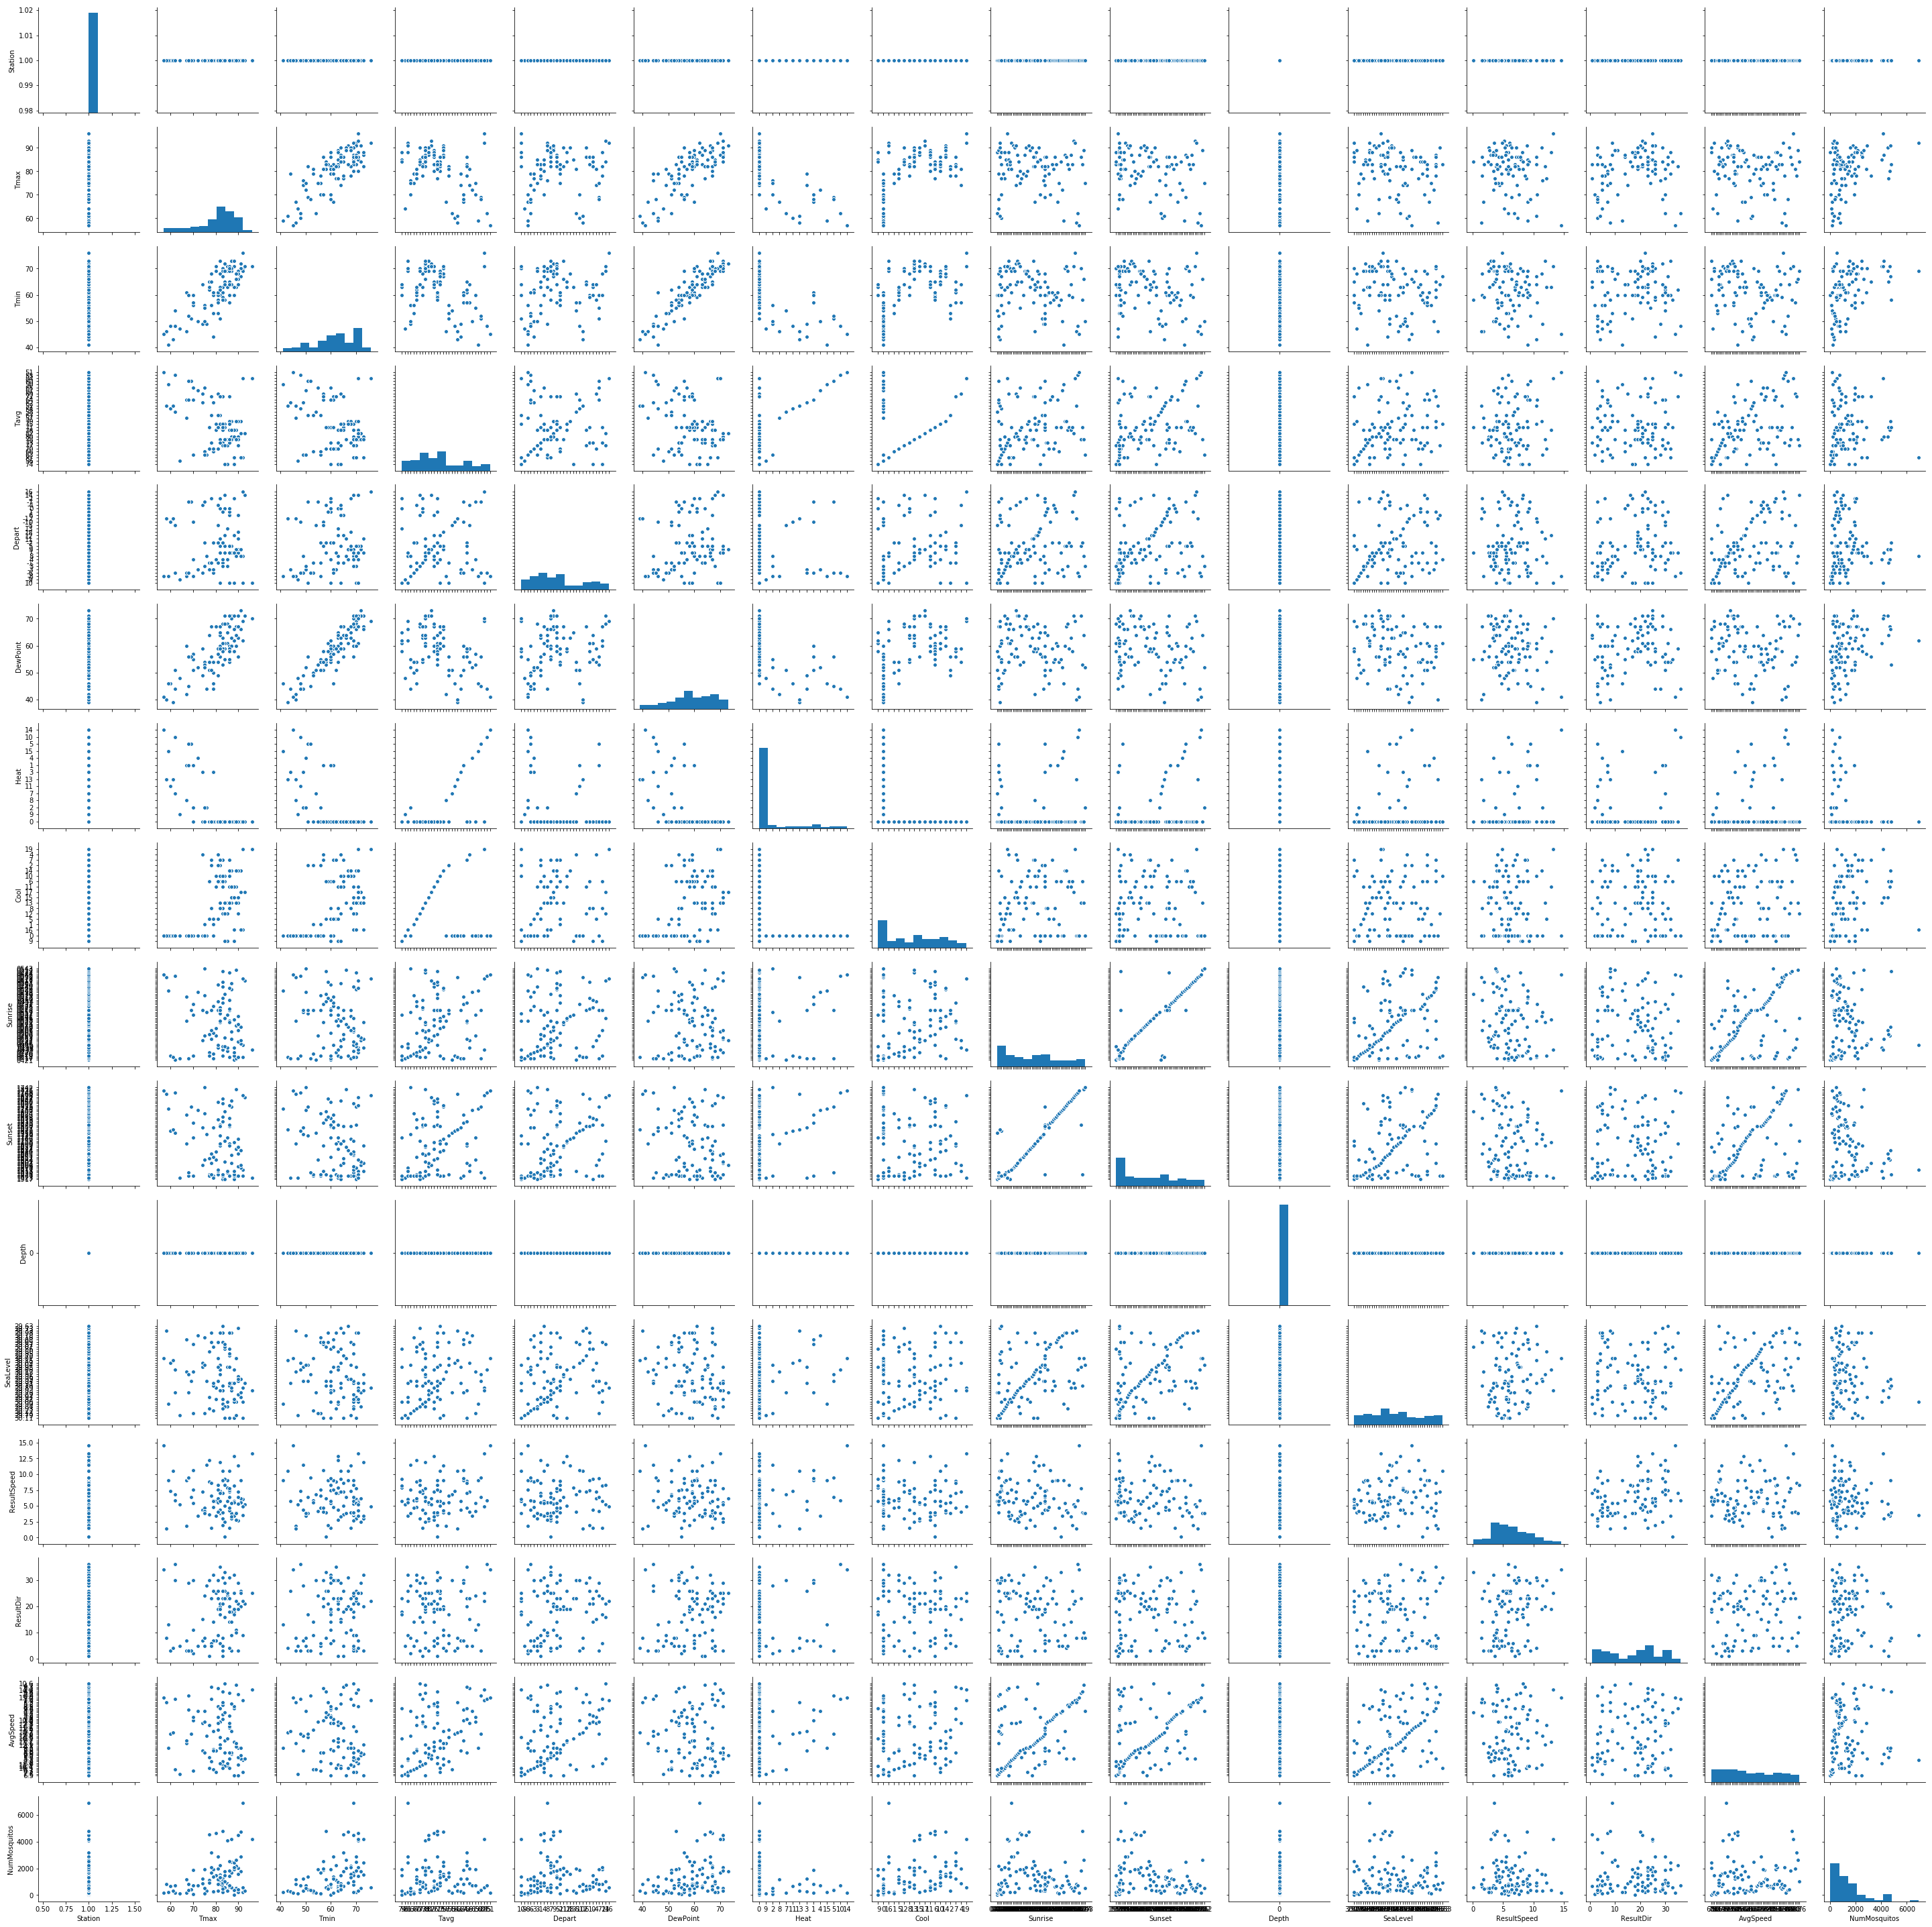

In [149]:
sns.pairplot(weather_mosq)

In [162]:
X = weather_mosq[["Tmax", "Tmin", "Tavg", "Depart", "DewPoint", "Heat", "Cool", "Sunrise", "Sunset"]]
y = weather_mosq[["NumMosquitos"]]

In [164]:
lr = LinearRegression()
lr.fit(X, y)

print("Train data CV score:", cross_val_score(lr, X, y))

Train data CV score: [ 0.08202759 -0.993009   -0.05052461]


In [169]:
rfr = RandomForestRegressor()
rfr.fit(X, y)

print("Train data CV score:", cross_val_score(rfr, X, y))

Train data CV score: [-0.0378453  -1.23076699 -0.63843446]


C:\Users\JW\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\JW\Anaconda3\envs\dsi\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\JW\Anaconda3\envs\dsi\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\JW\Anaconda3\envs\dsi\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

In [174]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
lr.score(X,y)
#print("Train data CV score:", cross_val_score(dtr, X, y))

0.27240815115840855